# **Analisi predittiva**

In [1]:
# !pip install meteostat
# !pip install airportsdata
# !pip install tensorflow

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# from meteostat import Point, Stations, Hourly
# from datetime import datetime, timedelta
# from airportsdata import load

In [4]:
# Neural network
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.utils import resample
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import confusion_matrix

In [5]:
from google.colab import drive

drive.mount("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [6]:
pd.set_option('display.max_columns', None)

In [7]:
file_path = "/content/drive/MyDrive/cleaned csv/Airport cleaned data.csv"
df = pd.read_csv(file_path)

In [8]:
# file_path = "cleaned csv/Airport cleaned with position.csv"
# df = pd.read_csv(file_path)

In [9]:
df

,CODE_CARRIER,ID_CARRIER,TAIL_NUM,FLIGHT_NUMBER,ORIGIN_AIRPORT_ID,ORIGIN_IATA,ORIGIN_CITY_NAME,ORIGIN_STATE_ABR,ORIGIN_STATE_NM,DEST_AIRPORT_ID,DEST_IATA,DEST_CITY_NAME,DEST_STATE_ABR,DEST_STATE_NM,DEP_DELAY,ARR_DELAY,CANCELLED,CANCELLATION_CODE,DIVERTED,PROGRAMMED_TOTAL_FLIGHT_TIME,ACTUAL_TOTAL_FLIGHT_TIME,AIR_TIME,FLIGHTS,DISTANCE,CARRIER_DELAY,WEATHER_DELAY,NAS_DELAY,SECURITY_DELAY,LATE_AIRCRAFT_DELAY,PROGRAMMED_DEPARTING_TIME_UTC,ACTUAL_DEPARTING_TIME_UTC,PROGRAMMED_ARRIVING_TIME_UTC,ACTUAL_ARRIVING_TIME_UTC
0,9E,20363,N131EV,4838.0,14122,PIT,"Pittsburgh, PA",PA,Pennsylvania,12478,JFK,"New York, NY",NY,New York,-4.0,-25.0,0.0,NaN,0.0,123.0,102.0,70.0,1.0,340.0,NaN,NaN,NaN,NaN,NaN,2024-07-01 22:12:00+00:00,2024-07-01 22:08:00+00:00,2024-07-02 00:15:00+00:00,2024-07-01 23:50:00+00:00
1,9E,20363,N131EV,5011.0,11433,DTW,"Detroit, MI",MI,Michigan,13244,MEM,"Memphis, TN",TN,Tennessee,-6.0,-7.0,0.0,NaN,0.0,118.0,117.0,85.0,1.0,610.0,NaN,NaN,NaN,NaN,NaN,2024-07-01 12:25:00+00:00,2024-07-01 12:19:00+00:00,2024-07-01 14:23:00+00:00,2024-07-01 14:16:00+00:00
2,9E,20363,N131EV,5011.0,13244,MEM,"Memphis, TN",TN,Tennessee,11433,DTW,"Detroit, MI",MI,Michigan,-3.0,-12.0,0.0,NaN,0.0,117.0,108.0,85.0,1.0,610.0,NaN,NaN,NaN,NaN,NaN,2024-07-01 17:00:00+00:00,2024-07-01 16:57:00+00:00,2024-07-01 18:57:00+00:00,2024-07-01 18:45:00+00:00
3,9E,20363,N131EV,5034.0,11433,DTW,"Detroit, MI",MI,Michigan,14122,PIT,"Pittsburgh, PA",PA,Pennsylvania,3.0,1.0,0.0,NaN,0.0,71.0,69.0,39.0,1.0,201.0,NaN,NaN,NaN,NaN,NaN,2024-07-01 20:21:00+00:00,2024-07-01 20:24:00+00:00,2024-07-01 21:32:00+00:00,2024-07-01 21:33:00+00:00
4,9E,20363,N131EV,5423.0,12478,JFK,"New York, NY",NY,New York,10821,BWI,"Baltimore, MD",MD,Maryland,0.0,-21.0,0.0,NaN,0.0,92.0,71.0,45.0,1.0,184.0,NaN,NaN,NaN,NaN,NaN,2024-07-02 01:10:00+00:00,2024-07-02 01:10:00+00:00,2024-07-02 02:42:00+00:00,2024-07-02 02:21:00+00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1247823,YX,20452,N882RW,5836.0,10154,ACK,"Nantucket, MA",MA,Massachusetts,12478,JFK,"New York, NY",NY,New York,-4.0,34.0,0.0,NaN,0.0,78.0,116.0,41.0,1.0,199.0,0.0,0.0,34.0,0.0,0.0,2024-08-31 18:50:00+00:00,2024-08-31 18:46:00+00:00,2024-08-31 20:08:00+00:00,2024-08-31 20:42:00+00:00
1247824,YX,20452,N882RW,5836.0,12478,JFK,"New York, NY",NY,New York,10154,ACK,"Nantucket, MA",MA,Massachusetts,-10.0,-26.0,0.0,NaN,0.0,79.0,63.0,36.0,1.0,199.0,NaN,NaN,NaN,NaN,NaN,2024-08-31 16:50:00+00:00,2024-08-31 16:40:00+00:00,2024-08-31 18:09:00+00:00,2024-08-31 17:43:00+00:00
1247825,YX,20452,N882RW,5848.0,14524,RIC,"Richmond, VA",VA,Virginia,12478,JFK,"New York, NY",NY,New York,-7.0,-3.0,0.0,NaN,0.0,85.0,89.0,57.0,1.0,288.0,NaN,NaN,NaN,NaN,NaN,2024-08-31 14:00:00+00:00,2024-08-31 13:53:00+00:00,2024-08-31 15:25:00+00:00,2024-08-31 15:22:00+00:00
1247826,YX,20452,N979RP,3482.0,11618,EWR,"Newark, NJ",NJ,New Jersey,11986,GRR,"Grand Rapids, MI",MI,Michigan,-4.0,-24.0,0.0,NaN,0.0,134.0,114.0,87.0,1.0,605.0,NaN,NaN,NaN,NaN,NaN,2024-08-31 13:44:00+00:00,2024-08-31 13:40:00+00:00,2024-08-31 15:58:00+00:00,2024-08-31 15:34:00+00:00


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1247828 entries, 0 to 1247827
Data columns (total 33 columns):
 #   Column                         Non-Null Count    Dtype  
---  ------                         --------------    -----  
 0   CODE_CARRIER                   1247828 non-null  object 
 1   ID_CARRIER                     1247828 non-null  int64  
 2   TAIL_NUM                       1247828 non-null  object 
 3   FLIGHT_NUMBER                  1247828 non-null  float64
 4   ORIGIN_AIRPORT_ID              1247828 non-null  int64  
 5   ORIGIN_IATA                    1247828 non-null  object 
 6   ORIGIN_CITY_NAME               1247828 non-null  object 
 7   ORIGIN_STATE_ABR               1247828 non-null  object 
 8   ORIGIN_STATE_NM                1247828 non-null  object 
 9   DEST_AIRPORT_ID                1247828 non-null  int64  
 10  DEST_IATA                      1247828 non-null  object 
 11  DEST_CITY_NAME                 1247828 non-null  object 
 12  DEST_STATE_ABR

In [11]:
df.isna().sum()

,0
CODE_CARRIER,0
ID_CARRIER,0
TAIL_NUM,0
FLIGHT_NUMBER,0
ORIGIN_AIRPORT_ID,0
ORIGIN_IATA,0
ORIGIN_CITY_NAME,0
ORIGIN_STATE_ABR,0
ORIGIN_STATE_NM,0
DEST_AIRPORT_ID,0


In [12]:
# Convertire le colonne in oggetti datetime
df['PROGRAMMED_DEPARTING_TIME_UTC'] = pd.to_datetime(df['PROGRAMMED_DEPARTING_TIME_UTC'])
df['PROGRAMMED_ARRIVING_TIME_UTC'] = pd.to_datetime(df['PROGRAMMED_ARRIVING_TIME_UTC'])
df['ACTUAL_DEPARTING_TIME_UTC'] = pd.to_datetime(df['ACTUAL_DEPARTING_TIME_UTC'])
df['ACTUAL_ARRIVING_TIME_UTC'] = pd.to_datetime(df['ACTUAL_ARRIVING_TIME_UTC'])

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1247828 entries, 0 to 1247827
Data columns (total 33 columns):
 #   Column                         Non-Null Count    Dtype              
---  ------                         --------------    -----              
 0   CODE_CARRIER                   1247828 non-null  object             
 1   ID_CARRIER                     1247828 non-null  int64              
 2   TAIL_NUM                       1247828 non-null  object             
 3   FLIGHT_NUMBER                  1247828 non-null  float64            
 4   ORIGIN_AIRPORT_ID              1247828 non-null  int64              
 5   ORIGIN_IATA                    1247828 non-null  object             
 6   ORIGIN_CITY_NAME               1247828 non-null  object             
 7   ORIGIN_STATE_ABR               1247828 non-null  object             
 8   ORIGIN_STATE_NM                1247828 non-null  object             
 9   DEST_AIRPORT_ID                1247828 non-null  int64              

In [14]:
df.columns

Index(['CODE_CARRIER', 'ID_CARRIER', 'TAIL_NUM', 'FLIGHT_NUMBER',
       'ORIGIN_AIRPORT_ID', 'ORIGIN_IATA', 'ORIGIN_CITY_NAME',
       'ORIGIN_STATE_ABR', 'ORIGIN_STATE_NM', 'DEST_AIRPORT_ID', 'DEST_IATA',
       'DEST_CITY_NAME', 'DEST_STATE_ABR', 'DEST_STATE_NM', 'DEP_DELAY',
       'ARR_DELAY', 'CANCELLED', 'CANCELLATION_CODE', 'DIVERTED',
       'PROGRAMMED_TOTAL_FLIGHT_TIME', 'ACTUAL_TOTAL_FLIGHT_TIME', 'AIR_TIME',
       'FLIGHTS', 'DISTANCE', 'CARRIER_DELAY', 'WEATHER_DELAY', 'NAS_DELAY',
       'SECURITY_DELAY', 'LATE_AIRCRAFT_DELAY',
       'PROGRAMMED_DEPARTING_TIME_UTC', 'ACTUAL_DEPARTING_TIME_UTC',
       'PROGRAMMED_ARRIVING_TIME_UTC', 'ACTUAL_ARRIVING_TIME_UTC'],
      dtype='object')

## **Neural network**

**1. Creation of target**

In [15]:
# Crate target variable called delayed
df['DELAYED'] = df['ARR_DELAY'].apply(lambda x: 1 if x > 15 else 0)

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1247828 entries, 0 to 1247827
Data columns (total 34 columns):
 #   Column                         Non-Null Count    Dtype              
---  ------                         --------------    -----              
 0   CODE_CARRIER                   1247828 non-null  object             
 1   ID_CARRIER                     1247828 non-null  int64              
 2   TAIL_NUM                       1247828 non-null  object             
 3   FLIGHT_NUMBER                  1247828 non-null  float64            
 4   ORIGIN_AIRPORT_ID              1247828 non-null  int64              
 5   ORIGIN_IATA                    1247828 non-null  object             
 6   ORIGIN_CITY_NAME               1247828 non-null  object             
 7   ORIGIN_STATE_ABR               1247828 non-null  object             
 8   ORIGIN_STATE_NM                1247828 non-null  object             
 9   DEST_AIRPORT_ID                1247828 non-null  int64              

**2. Drop NaN values for diverted and cancelled flights and fill NaN values**

In [17]:
# Dropout cancelled and diverted flights and fill nan values
df_opt = df.loc[df["AIR_TIME"] > 0]
df_opt = df_opt.drop(columns=["CANCELLATION_CODE"])
df_opt.fillna(0, inplace=True)
df_opt

,CODE_CARRIER,ID_CARRIER,TAIL_NUM,FLIGHT_NUMBER,ORIGIN_AIRPORT_ID,ORIGIN_IATA,ORIGIN_CITY_NAME,ORIGIN_STATE_ABR,ORIGIN_STATE_NM,DEST_AIRPORT_ID,DEST_IATA,DEST_CITY_NAME,DEST_STATE_ABR,DEST_STATE_NM,DEP_DELAY,ARR_DELAY,CANCELLED,DIVERTED,PROGRAMMED_TOTAL_FLIGHT_TIME,ACTUAL_TOTAL_FLIGHT_TIME,AIR_TIME,FLIGHTS,DISTANCE,CARRIER_DELAY,WEATHER_DELAY,NAS_DELAY,SECURITY_DELAY,LATE_AIRCRAFT_DELAY,PROGRAMMED_DEPARTING_TIME_UTC,ACTUAL_DEPARTING_TIME_UTC,PROGRAMMED_ARRIVING_TIME_UTC,ACTUAL_ARRIVING_TIME_UTC,DELAYED
0,9E,20363,N131EV,4838.0,14122,PIT,"Pittsburgh, PA",PA,Pennsylvania,12478,JFK,"New York, NY",NY,New York,-4.0,-25.0,0.0,0.0,123.0,102.0,70.0,1.0,340.0,0.0,0.0,0.0,0.0,0.0,2024-07-01 22:12:00+00:00,2024-07-01 22:08:00+00:00,2024-07-02 00:15:00+00:00,2024-07-01 23:50:00+00:00,0
1,9E,20363,N131EV,5011.0,11433,DTW,"Detroit, MI",MI,Michigan,13244,MEM,"Memphis, TN",TN,Tennessee,-6.0,-7.0,0.0,0.0,118.0,117.0,85.0,1.0,610.0,0.0,0.0,0.0,0.0,0.0,2024-07-01 12:25:00+00:00,2024-07-01 12:19:00+00:00,2024-07-01 14:23:00+00:00,2024-07-01 14:16:00+00:00,0
2,9E,20363,N131EV,5011.0,13244,MEM,"Memphis, TN",TN,Tennessee,11433,DTW,"Detroit, MI",MI,Michigan,-3.0,-12.0,0.0,0.0,117.0,108.0,85.0,1.0,610.0,0.0,0.0,0.0,0.0,0.0,2024-07-01 17:00:00+00:00,2024-07-01 16:57:00+00:00,2024-07-01 18:57:00+00:00,2024-07-01 18:45:00+00:00,0
3,9E,20363,N131EV,5034.0,11433,DTW,"Detroit, MI",MI,Michigan,14122,PIT,"Pittsburgh, PA",PA,Pennsylvania,3.0,1.0,0.0,0.0,71.0,69.0,39.0,1.0,201.0,0.0,0.0,0.0,0.0,0.0,2024-07-01 20:21:00+00:00,2024-07-01 20:24:00+00:00,2024-07-01 21:32:00+00:00,2024-07-01 21:33:00+00:00,0
4,9E,20363,N131EV,5423.0,12478,JFK,"New York, NY",NY,New York,10821,BWI,"Baltimore, MD",MD,Maryland,0.0,-21.0,0.0,0.0,92.0,71.0,45.0,1.0,184.0,0.0,0.0,0.0,0.0,0.0,2024-07-02 01:10:00+00:00,2024-07-02 01:10:00+00:00,2024-07-02 02:42:00+00:00,2024-07-02 02:21:00+00:00,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1247823,YX,20452,N882RW,5836.0,10154,ACK,"Nantucket, MA",MA,Massachusetts,12478,JFK,"New York, NY",NY,New York,-4.0,34.0,0.0,0.0,78.0,116.0,41.0,1.0,199.0,0.0,0.0,34.0,0.0,0.0,2024-08-31 18:50:00+00:00,2024-08-31 18:46:00+00:00,2024-08-31 20:08:00+00:00,2024-08-31 20:42:00+00:00,1
1247824,YX,20452,N882RW,5836.0,12478,JFK,"New York, NY",NY,New York,10154,ACK,"Nantucket, MA",MA,Massachusetts,-10.0,-26.0,0.0,0.0,79.0,63.0,36.0,1.0,199.0,0.0,0.0,0.0,0.0,0.0,2024-08-31 16:50:00+00:00,2024-08-31 16:40:00+00:00,2024-08-31 18:09:00+00:00,2024-08-31 17:43:00+00:00,0
1247825,YX,20452,N882RW,5848.0,14524,RIC,"Richmond, VA",VA,Virginia,12478,JFK,"New York, NY",NY,New York,-7.0,-3.0,0.0,0.0,85.0,89.0,57.0,1.0,288.0,0.0,0.0,0.0,0.0,0.0,2024-08-31 14:00:00+00:00,2024-08-31 13:53:00+00:00,2024-08-31 15:25:00+00:00,2024-08-31 15:22:00+00:00,0
1247826,YX,20452,N979RP,3482.0,11618,EWR,"Newark, NJ",NJ,New Jersey,11986,GRR,"Grand Rapids, MI",MI,Michigan,-4.0,-24.0,0.0,0.0,134.0,114.0,87.0,1.0,605.0,0.0,0.0,0.0,0.0,0.0,2024-08-31 13:44:00+00:00,2024-08-31 13:40:00+00:00,2024-08-31 15:58:00+00:00,2024-08-31 15:34:00+00:00,0


In [18]:
df_opt.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1218240 entries, 0 to 1247827
Data columns (total 33 columns):
 #   Column                         Non-Null Count    Dtype              
---  ------                         --------------    -----              
 0   CODE_CARRIER                   1218240 non-null  object             
 1   ID_CARRIER                     1218240 non-null  int64              
 2   TAIL_NUM                       1218240 non-null  object             
 3   FLIGHT_NUMBER                  1218240 non-null  float64            
 4   ORIGIN_AIRPORT_ID              1218240 non-null  int64              
 5   ORIGIN_IATA                    1218240 non-null  object             
 6   ORIGIN_CITY_NAME               1218240 non-null  object             
 7   ORIGIN_STATE_ABR               1218240 non-null  object             
 8   ORIGIN_STATE_NM                1218240 non-null  object             
 9   DEST_AIRPORT_ID                1218240 non-null  int64              
 10 

**3. Balancing 2 classes**

In [20]:
# 1. Too much examples of not delayed
df_majority = df_opt[df_opt['DELAYED'] == 0]
df_minority = df_opt[df_opt['DELAYED'] == 1]

# 2. Undersampling of majority class
df_majority_downsampled = resample(df_majority,
                                 replace = False,    # row select only once
                                 n_samples = len(df_minority), # select same numbers of row as delayed examples
                                 random_state = 42) # reproducible results

# 3. Concat 2 dataset minority and balanced_majority
df_undersampled = pd.concat([df_majority_downsampled, df_minority])

**4. Select features and target**

In [21]:
# Select features
X_undersampled = df_undersampled[['ORIGIN_AIRPORT_ID', 'DEST_AIRPORT_ID', 'DISTANCE', 'PROGRAMMED_TOTAL_FLIGHT_TIME', 'AIR_TIME', "ID_CARRIER"]]

# Select target
y_undersampled = df_undersampled['DELAYED']

In [18]:
# # Select features
# X = df_opt[['ORIGIN_AIRPORT_ID', 'DEST_AIRPORT_ID', 'DISTANCE', 'PROGRAMMED_TOTAL_FLIGHT_TIME', 'AIR_TIME', "ID_CARRIER"]]

# # Select target
# y = df_opt['DELAYED']

**5. Split data between train, test and validation**

In [22]:
# Split data into train, test and evaluation set
X_train, X_temp, y_train, y_temp = train_test_split(X_undersampled, y_undersampled, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

In [19]:
# # Split data into train, test and evaluation set
# X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)
# X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

**6. One hot encoding and Data normalization**

In [23]:
# Preprocessing
categorical_features = ['ORIGIN_AIRPORT_ID', 'DEST_AIRPORT_ID', 'ID_CARRIER']
numeric_features = ['DISTANCE', 'PROGRAMMED_TOTAL_FLIGHT_TIME', 'AIR_TIME']

preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_features),
        ('cat', OneHotEncoder(handle_unknown='ignore', sparse_output=False), categorical_features)
    ])

X_train_processed = preprocessor.fit_transform(X_train)
X_val_processed = preprocessor.transform(X_val)
X_test_processed = preprocessor.transform(X_test)

**7. Creation of the model and its parameters**

In [24]:
# Building the model
model = Sequential([
    Dense(128, activation='relu', input_shape=(X_train_processed.shape[1],)),
    Dense(64, activation='relu'),
    Dense(32, activation='relu'),
    Dense(1, activation='sigmoid')
])


# Compile the model with binary cross-entropy loss and Adam optimizer
model.compile(
    loss='binary_crossentropy',
    optimizer=Adam(learning_rate=0.001),
    metrics=['accuracy']
)

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


**8. Training of the model**

In [25]:
# Model fitting
model.fit(
    X_train_processed, y_train,
    epochs=3,
    batch_size=32,
    validation_data=(X_val_processed, y_val)
)

Epoch 1/3
13781/13781 ━━━━━━━━━━━━━━━━━━━━ 48s 3ms/step - accuracy: 0.5767 - loss: 0.6707 - val_accuracy: 0.6001 - val_loss: 0.6568
Epoch 2/3
13781/13781 ━━━━━━━━━━━━━━━━━━━━ 81s 3ms/step - accuracy: 0.6022 - loss: 0.6525 - val_accuracy: 0.5999 - val_loss: 0.6536
Epoch 3/3
13781/13781 ━━━━━━━━━━━━━━━━━━━━ 84s 3ms/step - accuracy: 0.6087 - loss: 0.6485 - val_accuracy: 0.6076 - val_loss: 0.6514


**9. Evaluation fo the model**

In [26]:
# Test evaluation
loss, accuracy = model.evaluate(X_test_processed, y_test)
print("Accuracy sul test set:", accuracy)
print("Loss sul test set:", loss)

2953/2953 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - accuracy: 0.6064 - loss: 0.6521
Accuracy sul test set: 0.6039918065071106
Loss sul test set: 0.6532226204872131


**10. Matrix confusion**

2953/2953 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step
Confusion Matrix:
[[31918 15264]
 [22156 25155]]


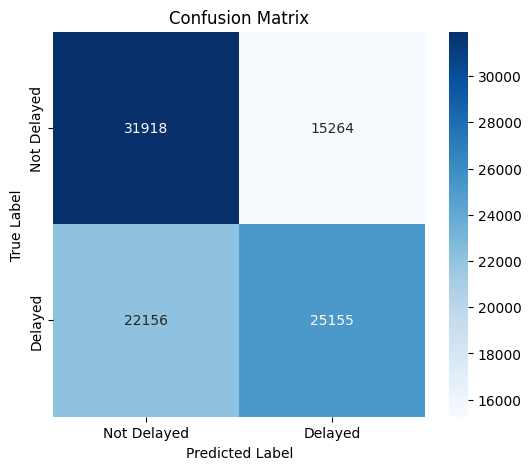

In [27]:
# Confusion matrix generation
y_pred_prob = model.predict(X_test_processed)
y_pred = np.round(y_pred_prob).astype(int)
cm = confusion_matrix(y_test, y_pred)

print("Confusion Matrix:")
print(cm)

plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=['Not Delayed', 'Delayed'],
            yticklabels=['Not Delayed', 'Delayed'])
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()


In [30]:
# Saving model
model.save('/content/drive/MyDrive/model/V5.keras')